<a href="https://colab.research.google.com/github/shraddhaborah/PriceResearch/blob/main/PriceResearch_ShraddhaBorah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
EXCEL_PATH = "/price_research_ShraddhaBorah - Data.csv"


In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv(EXCEL_PATH)

# Basic cleanup
for col in ["Item","Retailer","Product_URL","In_Stock","Price_Type","Specs_Notes","Model_or_SKU","Notes"]:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()

num_cols = ["Price_USD","Shipping_USD","Tax_Rate_pct","Total_Price_USD"]
for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# Compute total if blank: Price + Shipping + Price*Tax%
if "Total_Price_USD" not in df.columns:
    df["Total_Price_USD"] = np.nan

computed = df["Price_USD"].fillna(0) + df["Shipping_USD"].fillna(0) + df["Price_USD"].fillna(0)*df["Tax_Rate_pct"].fillna(0)/100
df["Total_Final"] = df["Total_Price_USD"].fillna(computed).round(2)

# Filter to comparable quotes (in-stock + has price)
valid = df.copy()
valid["In_Stock"] = valid["In_Stock"].str.upper()
valid = valid[(valid["In_Stock"] == "Y") & (valid["Total_Final"] > 0)]


In [7]:
# Lowest row per Item
idx = valid.groupby("Item")["Total_Final"].idxmin()
lowest = valid.loc[idx, ["Item","Retailer","Total_Final","Product_URL"]].sort_values("Item").reset_index(drop=True)

# Average total per Item
avg = valid.groupby("Item", as_index=False)["Total_Final"].mean().rename(columns={"Total_Final":"Average_Total"})

# Count of quotes per Item
counts = valid.groupby("Item", as_index=False).size().rename(columns={"size":"Quotes_Count"})

summary = (lowest
           .merge(avg, on="Item", how="left")
           .merge(counts, on="Item", how="left"))

summary


,Item,Retailer,Total_Final,Product_URL,Average_Total,Quotes_Count
0,Laptop,NFM,834.75,https://www.nfm.com/acer-14-swift-go-14--intel...,945.1625,4
1,Printer,Amazon,149.99,https://www.amazon.com/Brother-Monochrome-Mult...,510.0100,2
2,Spiral Notebooks (3),Staples,16.74,https://www.staples.com/staples-1-subject-note...,19.6350,2
3,Stapler,Staples,34.94,https://www.staples.com/swingline-747-business...,54.9750,2
4,Staples,Bostitch,12.98,https://bostitchoffice.com/premium-standard-st...,19.1300,2


In [17]:
import pandas as pd
import numpy as np

df = pd.read_csv(EXCEL_PATH)

# Basic cleanup
for col in ["Item","Retailer","Product_URL","In_Stock","Price_Type","Specs_Notes","Model_or_SKU","Notes"]:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()

num_cols = ["Price_USD","Shipping_USD","Tax_Rate_pct","Total_Price_USD"]
for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# Compute total if blank: Price + Shipping + Price*Tax%
if "Total_Price_USD" not in df.columns:
    df["Total_Price_USD"] = np.nan

computed = df["Price_USD"].fillna(0) + df["Shipping_USD"].fillna(0) + df["Price_USD"].fillna(0)*df["Tax_Rate_pct"].fillna(0)/100
df["Total_Final"] = df["Total_Price_USD"].fillna(computed).round(2)

# Filter to comparable quotes (in-stock + has price)
valid = df.copy()
valid["In_Stock"] = valid["In_Stock"].str.upper()
valid = valid[(valid["In_Stock"] == "Y") & (valid["Total_Final"] > 0)]

In [18]:
# Lowest row per Item
idx = valid.groupby("Item")["Total_Final"].idxmin()
lowest = valid.loc[idx, ["Item","Retailer","Total_Final","Product_URL"]].sort_values("Item").reset_index(drop=True)

# Average total per Item
avg = valid.groupby("Item", as_index=False)["Total_Final"].mean().rename(columns={"Total_Final":"Average_Total"})

# Count of quotes per Item
counts = valid.groupby("Item", as_index=False).size().rename(columns={"size":"Quotes_Count"})

summary = (lowest
           .merge(avg, on="Item", how="left")
           .merge(counts, on="Item", how="left"))

summary

,Item,Retailer,Total_Final,Product_URL,Average_Total,Quotes_Count
0,Laptop,NFM,834.75,https://www.nfm.com/acer-14-swift-go-14--intel...,945.1625,4
1,Printer,Amazon,149.99,https://www.amazon.com/Brother-Monochrome-Mult...,510.0100,2
2,Spiral Notebooks (3),Staples,16.74,https://www.staples.com/staples-1-subject-note...,19.6350,2
3,Stapler,Staples,34.94,https://www.staples.com/swingline-747-business...,54.9750,2
4,Staples,Bostitch,12.98,https://bostitchoffice.com/premium-standard-st...,19.1300,2


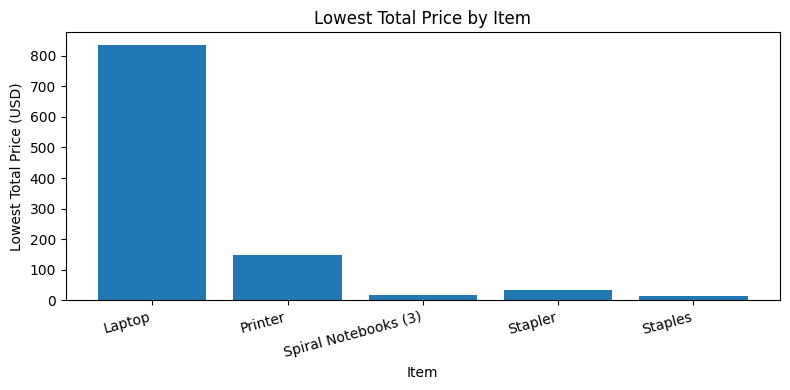

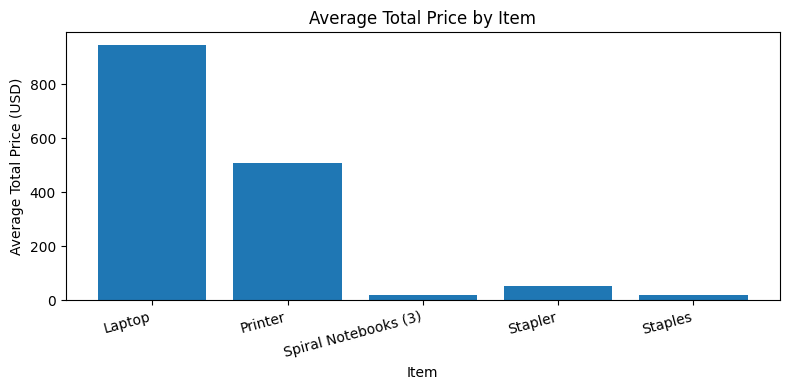

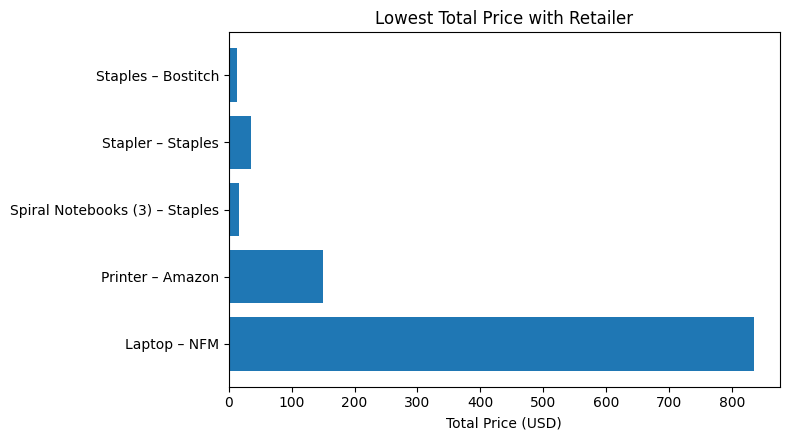

In [19]:
import matplotlib.pyplot as plt

# --- Bar chart: Lowest price by Item ---
plt.figure(figsize=(8,4))
plt.bar(summary["Item"], summary["Total_Final"])
plt.title("Lowest Total Price by Item")
plt.xlabel("Item")
plt.ylabel("Lowest Total Price (USD)")
plt.xticks(rotation=15, ha="right")
plt.tight_layout()
plt.savefig("lowest_price_by_item.png", dpi=200)
plt.show()

# --- Bar chart: Average price by Item ---
plt.figure(figsize=(8,4))
plt.bar(summary["Item"], summary["Average_Total"])
plt.title("Average Total Price by Item")
plt.xlabel("Item")
plt.ylabel("Average Total Price (USD)")
plt.xticks(rotation=15, ha="right")
plt.tight_layout()
plt.savefig("average_price_by_item.png", dpi=200)
plt.show()

# --- Horizontal bar: Lowest price + retailer labels ---
labels = [f"{i} – {r}" for i,r in zip(summary["Item"], summary["Retailer"])]
values = summary["Total_Final"].values

plt.figure(figsize=(8,4.5))
plt.barh(labels, values)
plt.title("Lowest Total Price with Retailer")
plt.xlabel("Total Price (USD)")
plt.tight_layout()
plt.savefig("lowest_price_with_retailer.png", dpi=200)
plt.show()

/tmp/ipython-input-1821970435.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=items, vert=True, showfliers=True)


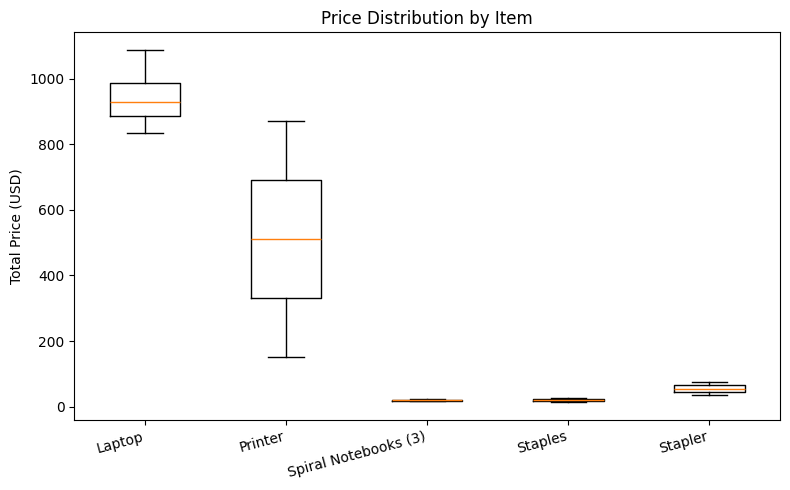

In [20]:
# Box plot to show spread across retailers for each item
plt.figure(figsize=(8,5))
items = valid["Item"].unique()
data = [valid.loc[valid["Item"]==it, "Total_Final"].values for it in items]
plt.boxplot(data, labels=items, vert=True, showfliers=True)
plt.title("Price Distribution by Item")
plt.ylabel("Total Price (USD)")
plt.xticks(rotation=15, ha="right")
plt.tight_layout()
plt.savefig("price_distribution_by_item.png", dpi=200)
plt.show()

In [21]:
display_cols = ["Item","Retailer","Total_Final","Product_URL","Quotes_Count","Average_Total"]
tbl = summary[display_cols].copy()
tbl = tbl.sort_values("Item").reset_index(drop=True)
tbl

,Item,Retailer,Total_Final,Product_URL,Quotes_Count,Average_Total
0,Laptop,NFM,834.75,https://www.nfm.com/acer-14-swift-go-14--intel...,4,945.1625
1,Printer,Amazon,149.99,https://www.amazon.com/Brother-Monochrome-Mult...,2,510.0100
2,Spiral Notebooks (3),Staples,16.74,https://www.staples.com/staples-1-subject-note...,2,19.6350
3,Stapler,Staples,34.94,https://www.staples.com/swingline-747-business...,2,54.9750
4,Staples,Bostitch,12.98,https://bostitchoffice.com/premium-standard-st...,2,19.1300


In [22]:
from docx import Document
from docx.shared import Inches

doc = Document()
doc.add_heading("Price Research Summary", level=1)

doc.add_paragraph("This report summarizes current prices collected from reputable U.S. retailers. "
                  "Totals include item price + shipping + (price × tax rate) when provided. "
                  "Only in-stock quotes were considered for ‘lowest’ and ‘average’ calculations.")

# Insert figures you saved
for fig in ["lowest_price_by_item.png", "average_price_by_item.png", "lowest_price_with_retailer.png", "price_distribution_by_item.png"]:
    doc.add_picture(fig, width=Inches(6))
    doc.add_paragraph("")  # spacing

# Add key table
doc.add_heading("Lowest & Average Prices", level=2)
# Quick text table (simple). For a prettier table you can render separately and paste.
for _, row in tbl.iterrows():
    doc.add_paragraph(f"- {row['Item']}: Lowest ${row['Total_Final']} at {row['Retailer']} | "
                      f"Avg ${row['Average_Total']:.2f} | {row['Quotes_Count']} quotes")

out_path = "Price_Research_Summary.docx"
doc.save(out_path)
out_path

'Price_Research_Summary.docx'

In [12]:
import pandas as pd
import numpy as np

df = pd.read_csv(EXCEL_PATH)

# Basic cleanup
for col in ["Item","Retailer","Product_URL","In_Stock","Price_Type","Specs_Notes","Model_or_SKU","Notes"]:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()

num_cols = ["Price_USD","Shipping_USD","Tax_Rate_pct","Total_Price_USD"]
for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# Compute total if blank: Price + Shipping + Price*Tax%
if "Total_Price_USD" not in df.columns:
    df["Total_Price_USD"] = np.nan

computed = df["Price_USD"].fillna(0) + df["Shipping_USD"].fillna(0) + df["Price_USD"].fillna(0)*df["Tax_Rate_pct"].fillna(0)/100
df["Total_Final"] = df["Total_Price_USD"].fillna(computed).round(2)

# Filter to comparable quotes (in-stock + has price)
valid = df.copy()
valid["In_Stock"] = valid["In_Stock"].str.upper()
valid = valid[(valid["In_Stock"] == "Y") & (valid["Total_Final"] > 0)]

FileNotFoundError: [Errno 2] No such file or directory: '/price_research_ShraddhaBorah - Data.csv'

In [13]:
# Lowest row per Item
idx = valid.groupby("Item")["Total_Final"].idxmin()
lowest = valid.loc[idx, ["Item","Retailer","Total_Final","Product_URL"]].sort_values("Item").reset_index(drop=True)

# Average total per Item
avg = valid.groupby("Item", as_index=False)["Total_Final"].mean().rename(columns={"Total_Final":"Average_Total"})

# Count of quotes per Item
counts = valid.groupby("Item", as_index=False).size().rename(columns={"size":"Quotes_Count"})

summary = (lowest
           .merge(avg, on="Item", how="left")
           .merge(counts, on="Item", how="left"))

summary

NameError: name 'valid' is not defined

In [14]:
import matplotlib.pyplot as plt

# --- Bar chart: Lowest price by Item ---
plt.figure(figsize=(8,4))
plt.bar(summary["Item"], summary["Total_Final"])
plt.title("Lowest Total Price by Item")
plt.xlabel("Item")
plt.ylabel("Lowest Total Price (USD)")
plt.xticks(rotation=15, ha="right")
plt.tight_layout()
plt.savefig("lowest_price_by_item.png", dpi=200)
plt.show()

# --- Bar chart: Average price by Item ---
plt.figure(figsize=(8,4))
plt.bar(summary["Item"], summary["Average_Total"])
plt.title("Average Total Price by Item")
plt.xlabel("Item")
plt.ylabel("Average Total Price (USD)")
plt.xticks(rotation=15, ha="right")
plt.tight_layout()
plt.savefig("average_price_by_item.png", dpi=200)
plt.show()

# --- Horizontal bar: Lowest price + retailer labels ---
labels = [f"{i} – {r}" for i,r in zip(summary["Item"], summary["Retailer"])]
values = summary["Total_Final"].values

plt.figure(figsize=(8,4.5))
plt.barh(labels, values)
plt.title("Lowest Total Price with Retailer")
plt.xlabel("Total Price (USD)")
plt.tight_layout()
plt.savefig("lowest_price_with_retailer.png", dpi=200)
plt.show()

NameError: name 'summary' is not defined

<Figure size 800x400 with 0 Axes>

In [15]:
# Box plot to show spread across retailers for each item
plt.figure(figsize=(8,5))
items = valid["Item"].unique()
data = [valid.loc[valid["Item"]==it, "Total_Final"].values for it in items]
plt.boxplot(data, labels=items, vert=True, showfliers=True)
plt.title("Price Distribution by Item")
plt.ylabel("Total Price (USD)")
plt.xticks(rotation=15, ha="right")
plt.tight_layout()
plt.savefig("price_distribution_by_item.png", dpi=200)
plt.show()

NameError: name 'valid' is not defined

<Figure size 800x500 with 0 Axes>

In [16]:
from docx import Document
from docx.shared import Inches

doc = Document()
doc.add_heading("Price Research Summary", level=1)

doc.add_paragraph("This report summarizes current prices collected from reputable U.S. retailers. "
                  "Totals include item price + shipping + (price × tax rate) when provided. "
                  "Only in-stock quotes were considered for ‘lowest’ and ‘average’ calculations.")

# Insert figures you saved
for fig in ["lowest_price_by_item.png", "average_price_by_item.png", "lowest_price_with_retailer.png", "price_distribution_by_item.png"]:
    doc.add_picture(fig, width=Inches(6))
    doc.add_paragraph("")  # spacing

# Add key table
doc.add_heading("Lowest & Average Prices", level=2)
# Quick text table (simple). For a prettier table you can render separately and paste.
for _, row in tbl.iterrows():
    doc.add_paragraph(f"- {row['Item']}: Lowest ${row['Total_Final']} at {row['Retailer']} | "
                      f"Avg ${row['Average_Total']:.2f} | {row['Quotes_Count']} quotes")

out_path = "Price_Research_Summary.docx"
doc.save(out_path)
out_path

FileNotFoundError: [Errno 2] No such file or directory: 'lowest_price_by_item.png'

In [11]:
EXCEL_PATH = "/price_research_ShraddhaBorah - Data.csv"

In [6]:
import pandas as pd
import numpy as np

df = pd.read_csv(EXCEL_PATH)

# Basic cleanup
for col in ["Item","Retailer","Product_URL","In_Stock","Price_Type","Specs_Notes","Model_or_SKU","Notes"]:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()

num_cols = ["Price_USD","Shipping_USD","Tax_Rate_pct","Total_Price_USD"]
for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# Compute total if blank: Price + Shipping + Price*Tax%
if "Total_Price_USD" not in df.columns:
    df["Total_Price_USD"] = np.nan

computed = df["Price_USD"].fillna(0) + df["Shipping_USD"].fillna(0) + df["Price_USD"].fillna(0)*df["Tax_Rate_pct"].fillna(0)/100
df["Total_Final"] = df["Total_Price_USD"].fillna(computed).round(2)

# Filter to comparable quotes (in-stock + has price)
valid = df.copy()
valid["In_Stock"] = valid["In_Stock"].str.upper()
valid = valid[(valid["In_Stock"] == "Y") & (valid["Total_Final"] > 0)]

NameError: name 'EXCEL_PATH' is not defined

In [7]:
# Lowest row per Item
idx = valid.groupby("Item")["Total_Final"].idxmin()
lowest = valid.loc[idx, ["Item","Retailer","Total_Final","Product_URL"]].sort_values("Item").reset_index(drop=True)

# Average total per Item
avg = valid.groupby("Item", as_index=False)["Total_Final"].mean().rename(columns={"Total_Final":"Average_Total"})

# Count of quotes per Item
counts = valid.groupby("Item", as_index=False).size().rename(columns={"size":"Quotes_Count"})

summary = (lowest
           .merge(avg, on="Item", how="left")
           .merge(counts, on="Item", how="left"))

summary

NameError: name 'valid' is not defined

In [8]:
import matplotlib.pyplot as plt

# --- Bar chart: Lowest price by Item ---
plt.figure(figsize=(8,4))
plt.bar(summary["Item"], summary["Total_Final"])
plt.title("Lowest Total Price by Item")
plt.xlabel("Item")
plt.ylabel("Lowest Total Price (USD)")
plt.xticks(rotation=15, ha="right")
plt.tight_layout()
plt.savefig("lowest_price_by_item.png", dpi=200)
plt.show()

# --- Bar chart: Average price by Item ---
plt.figure(figsize=(8,4))
plt.bar(summary["Item"], summary["Average_Total"])
plt.title("Average Total Price by Item")
plt.xlabel("Item")
plt.ylabel("Average Total Price (USD)")
plt.xticks(rotation=15, ha="right")
plt.tight_layout()
plt.savefig("average_price_by_item.png", dpi=200)
plt.show()

# --- Horizontal bar: Lowest price + retailer labels ---
labels = [f"{i} – {r}" for i,r in zip(summary["Item"], summary["Retailer"])]
values = summary["Total_Final"].values

plt.figure(figsize=(8,4.5))
plt.barh(labels, values)
plt.title("Lowest Total Price with Retailer")
plt.xlabel("Total Price (USD)")
plt.tight_layout()
plt.savefig("lowest_price_with_retailer.png", dpi=200)
plt.show()

NameError: name 'summary' is not defined

<Figure size 800x400 with 0 Axes>

In [9]:
# Box plot to show spread across retailers for each item
plt.figure(figsize=(8,5))
items = valid["Item"].unique()
data = [valid.loc[valid["Item"]==it, "Total_Final"].values for it in items]
plt.boxplot(data, labels=items, vert=True, showfliers=True)
plt.title("Price Distribution by Item")
plt.ylabel("Total Price (USD)")
plt.xticks(rotation=15, ha="right")
plt.tight_layout()
plt.savefig("price_distribution_by_item.png", dpi=200)
plt.show()

NameError: name 'valid' is not defined

<Figure size 800x500 with 0 Axes>

In [10]:
from docx import Document
from docx.shared import Inches

doc = Document()
doc.add_heading("Price Research Summary", level=1)

doc.add_paragraph("This report summarizes current prices collected from reputable U.S. retailers. "
                  "Totals include item price + shipping + (price × tax rate) when provided. "
                  "Only in-stock quotes were considered for ‘lowest’ and ‘average’ calculations.")

# Insert figures you saved
for fig in ["lowest_price_by_item.png", "average_price_by_item.png", "lowest_price_with_retailer.png", "price_distribution_by_item.png"]:
    doc.add_picture(fig, width=Inches(6))
    doc.add_paragraph("")  # spacing

# Add key table
doc.add_heading("Lowest & Average Prices", level=2)
# Quick text table (simple). For a prettier table you can render separately and paste.
for _, row in tbl.iterrows():
    doc.add_paragraph(f"- {row['Item']}: Lowest ${row['Total_Final']} at {row['Retailer']} | "
                      f"Avg ${row['Average_Total']:.2f} | {row['Quotes_Count']} quotes")

out_path = "Price_Research_Summary.docx"
doc.save(out_path)
out_path

FileNotFoundError: [Errno 2] No such file or directory: 'lowest_price_by_item.png'

In [4]:
import matplotlib.pyplot as plt

# --- Bar chart: Lowest price by Item ---
plt.figure(figsize=(8,4))
plt.bar(summary["Item"], summary["Total_Final"])
plt.title("Lowest Total Price by Item")
plt.xlabel("Item")
plt.ylabel("Lowest Total Price (USD)")
plt.xticks(rotation=15, ha="right")
plt.tight_layout()
plt.savefig("lowest_price_by_item.png", dpi=200)
plt.show()

# --- Bar chart: Average price by Item ---
plt.figure(figsize=(8,4))
plt.bar(summary["Item"], summary["Average_Total"])
plt.title("Average Total Price by Item")
plt.xlabel("Item")
plt.ylabel("Average Total Price (USD)")
plt.xticks(rotation=15, ha="right")
plt.tight_layout()
plt.savefig("average_price_by_item.png", dpi=200)
plt.show()

# --- Horizontal bar: Lowest price + retailer labels ---
labels = [f"{i} – {r}" for i,r in zip(summary["Item"], summary["Retailer"])]
values = summary["Total_Final"].values

plt.figure(figsize=(8,4.5))
plt.barh(labels, values)
plt.title("Lowest Total Price with Retailer")
plt.xlabel("Total Price (USD)")
plt.tight_layout()
plt.savefig("lowest_price_with_retailer.png", dpi=200)
plt.show()

NameError: name 'summary' is not defined

<Figure size 800x400 with 0 Axes>

In [5]:
# Box plot to show spread across retailers for each item
plt.figure(figsize=(8,5))
items = valid["Item"].unique()
data = [valid.loc[valid["Item"]==it, "Total_Final"].values for it in items]
plt.boxplot(data, labels=items, vert=True, showfliers=True)
plt.title("Price Distribution by Item")
plt.ylabel("Total Price (USD)")
plt.xticks(rotation=15, ha="right")
plt.tight_layout()
plt.savefig("price_distribution_by_item.png", dpi=200)
plt.show()

NameError: name 'valid' is not defined

<Figure size 800x500 with 0 Axes>

In [3]:
from docx import Document
from docx.shared import Inches

doc = Document()
doc.add_heading("Price Research Summary", level=1)

doc.add_paragraph("This report summarizes current prices collected from reputable U.S. retailers. "
                  "Totals include item price + shipping + (price × tax rate) when provided. "
                  "Only in-stock quotes were considered for ‘lowest’ and ‘average’ calculations.")

# Insert figures you saved
for fig in ["lowest_price_by_item.png", "average_price_by_item.png", "lowest_price_with_retailer.png", "price_distribution_by_item.png"]:
    doc.add_picture(fig, width=Inches(6))
    doc.add_paragraph("")  # spacing

# Add key table
doc.add_heading("Lowest & Average Prices", level=2)
# Quick text table (simple). For a prettier table you can render separately and paste.
for _, row in tbl.iterrows():
    doc.add_paragraph(f"- {row['Item']}: Lowest ${row['Total_Final']} at {row['Retailer']} | "
                      f"Avg ${row['Average_Total']:.2f} | {row['Quotes_Count']} quotes")

out_path = "Price_Research_Summary.docx"
doc.save(out_path)
out_path

FileNotFoundError: [Errno 2] No such file or directory: 'lowest_price_by_item.png'

In [2]:
!pip install python-docx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 4.8 MB/s eta 0:00:00


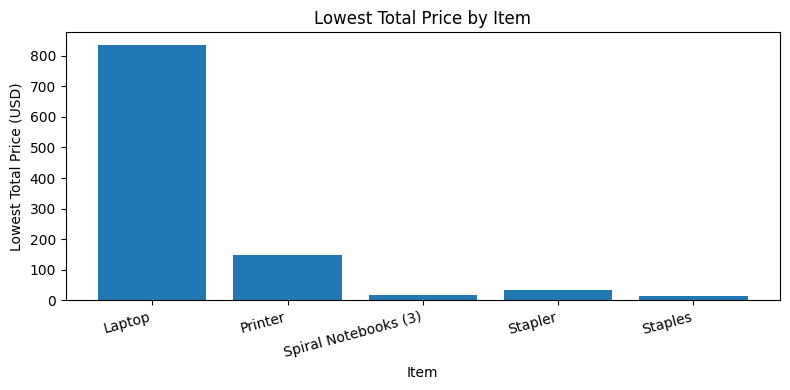

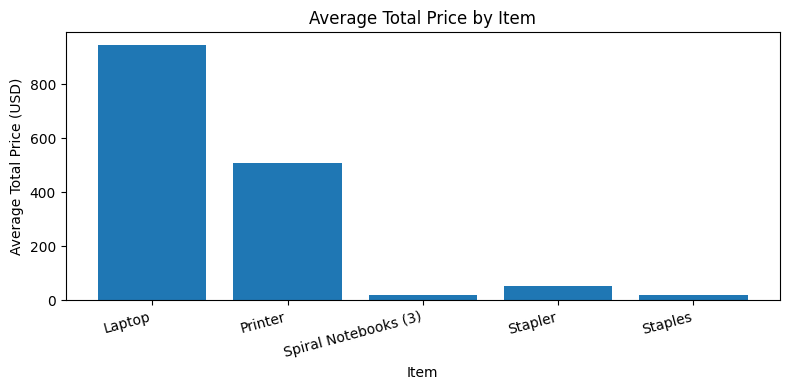

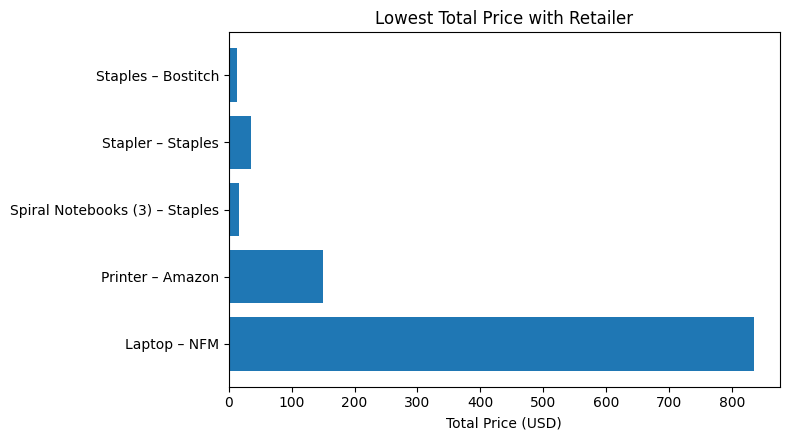

In [8]:
import matplotlib.pyplot as plt

# --- Bar chart: Lowest price by Item ---
plt.figure(figsize=(8,4))
plt.bar(summary["Item"], summary["Total_Final"])
plt.title("Lowest Total Price by Item")
plt.xlabel("Item")
plt.ylabel("Lowest Total Price (USD)")
plt.xticks(rotation=15, ha="right")
plt.tight_layout()
plt.savefig("lowest_price_by_item.png", dpi=200)
plt.show()

# --- Bar chart: Average price by Item ---
plt.figure(figsize=(8,4))
plt.bar(summary["Item"], summary["Average_Total"])
plt.title("Average Total Price by Item")
plt.xlabel("Item")
plt.ylabel("Average Total Price (USD)")
plt.xticks(rotation=15, ha="right")
plt.tight_layout()
plt.savefig("average_price_by_item.png", dpi=200)
plt.show()

# --- Horizontal bar: Lowest price + retailer labels ---
labels = [f"{i} – {r}" for i,r in zip(summary["Item"], summary["Retailer"])]
values = summary["Total_Final"].values

plt.figure(figsize=(8,4.5))
plt.barh(labels, values)
plt.title("Lowest Total Price with Retailer")
plt.xlabel("Total Price (USD)")
plt.tight_layout()
plt.savefig("lowest_price_with_retailer.png", dpi=200)
plt.show()


/tmp/ipython-input-475171017.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=items, vert=True, showfliers=True)


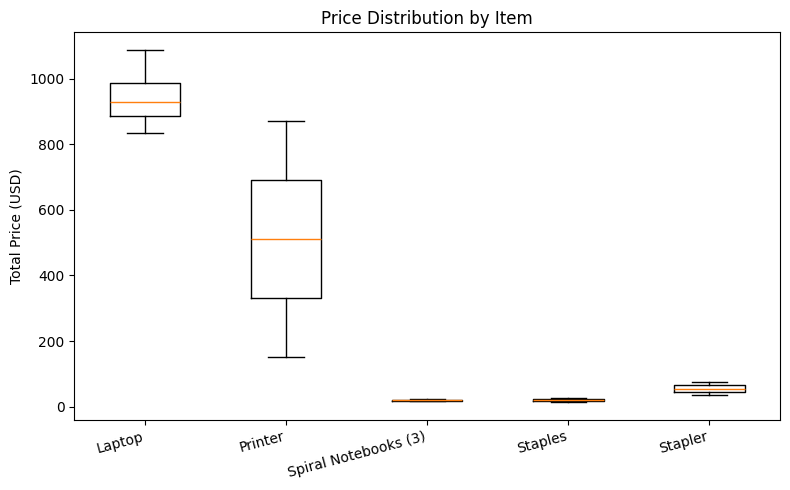

In [9]:
# Box plot to show spread across retailers for each item
plt.figure(figsize=(8,5))
items = valid["Item"].unique()
data = [valid.loc[valid["Item"]==it, "Total_Final"].values for it in items]
plt.boxplot(data, labels=items, vert=True, showfliers=True)
plt.title("Price Distribution by Item")
plt.ylabel("Total Price (USD)")
plt.xticks(rotation=15, ha="right")
plt.tight_layout()
plt.savefig("price_distribution_by_item.png", dpi=200)
plt.show()


In [10]:
display_cols = ["Item","Retailer","Total_Final","Product_URL","Quotes_Count","Average_Total"]
tbl = summary[display_cols].copy()
tbl = tbl.sort_values("Item").reset_index(drop=True)
tbl


,Item,Retailer,Total_Final,Product_URL,Quotes_Count,Average_Total
0,Laptop,NFM,834.75,https://www.nfm.com/acer-14-swift-go-14--intel...,4,945.1625
1,Printer,Amazon,149.99,https://www.amazon.com/Brother-Monochrome-Mult...,2,510.0100
2,Spiral Notebooks (3),Staples,16.74,https://www.staples.com/staples-1-subject-note...,2,19.6350
3,Stapler,Staples,34.94,https://www.staples.com/swingline-747-business...,2,54.9750
4,Staples,Bostitch,12.98,https://bostitchoffice.com/premium-standard-st...,2,19.1300


In [11]:
tbl.to_excel("price_summary_for_report.xlsx", index=False)
tbl.to_csv("price_summary_for_report.csv", index=False)


In [14]:
!pip install python-docx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 5.9 MB/s eta 0:00:00


In [23]:
import pandas as pd
import numpy as np

df = pd.read_csv(EXCEL_PATH)

# Basic cleanup
for col in ["Item","Retailer","Product_URL","In_Stock","Price_Type","Specs_Notes","Model_or_SKU","Notes"]:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip()

num_cols = ["Price_USD","Shipping_USD","Tax_Rate_pct","Total_Price_USD"]
for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

# Compute total if blank: Price + Shipping + Price*Tax%
if "Total_Price_USD" not in df.columns:
    df["Total_Price_USD"] = np.nan

computed = df["Price_USD"].fillna(0) + df["Shipping_USD"].fillna(0) + df["Price_USD"].fillna(0)*df["Tax_Rate_pct"].fillna(0)/100
df["Total_Final"] = df["Total_Price_USD"].fillna(computed).round(2)

# Filter to comparable quotes (in-stock + has price)
valid = df.copy()
valid["In_Stock"] = valid["In_Stock"].str.upper()
valid = valid[(valid["In_Stock"] == "Y") & (valid["Total_Final"] > 0)]

In [24]:
# Lowest row per Item
idx = valid.groupby("Item")["Total_Final"].idxmin()
lowest = valid.loc[idx, ["Item","Retailer","Total_Final","Product_URL"]].sort_values("Item").reset_index(drop=True)

# Average total per Item
avg = valid.groupby("Item", as_index=False)["Total_Final"].mean().rename(columns={"Total_Final":"Average_Total"})

# Count of quotes per Item
counts = valid.groupby("Item", as_index=False).size().rename(columns={"size":"Quotes_Count"})

summary = (lowest
           .merge(avg, on="Item", how="left")
           .merge(counts, on="Item", how="left"))

summary

,Item,Retailer,Total_Final,Product_URL,Average_Total,Quotes_Count
0,Laptop,NFM,834.75,https://www.nfm.com/acer-14-swift-go-14--intel...,945.1625,4
1,Printer,Amazon,149.99,https://www.amazon.com/Brother-Monochrome-Mult...,510.0100,2
2,Spiral Notebooks (3),Staples,16.74,https://www.staples.com/staples-1-subject-note...,19.6350,2
3,Stapler,Staples,34.94,https://www.staples.com/swingline-747-business...,54.9750,2
4,Staples,Bostitch,12.98,https://bostitchoffice.com/premium-standard-st...,19.1300,2


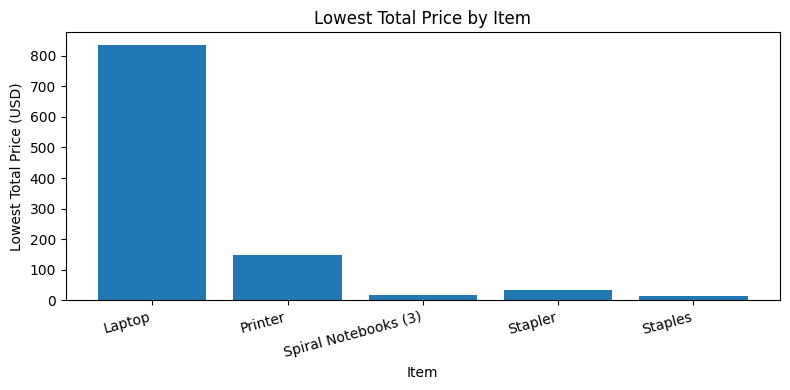

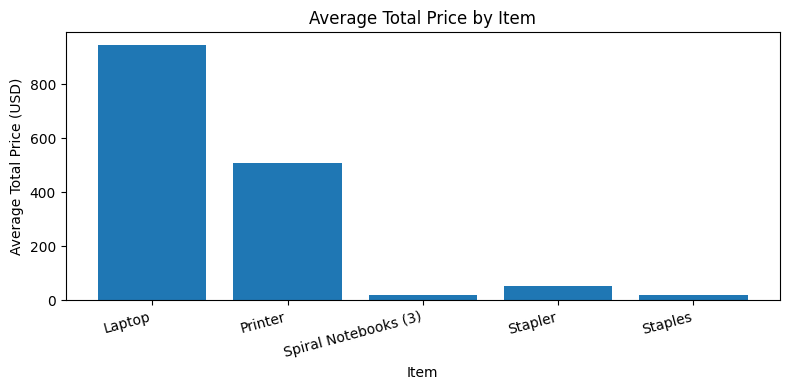

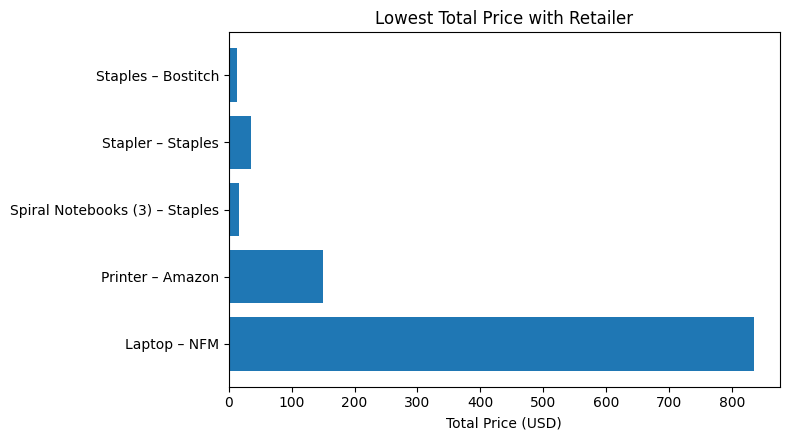

In [25]:
import matplotlib.pyplot as plt

# --- Bar chart: Lowest price by Item ---
plt.figure(figsize=(8,4))
plt.bar(summary["Item"], summary["Total_Final"])
plt.title("Lowest Total Price by Item")
plt.xlabel("Item")
plt.ylabel("Lowest Total Price (USD)")
plt.xticks(rotation=15, ha="right")
plt.tight_layout()
plt.savefig("lowest_price_by_item.png", dpi=200)
plt.show()

# --- Bar chart: Average price by Item ---
plt.figure(figsize=(8,4))
plt.bar(summary["Item"], summary["Average_Total"])
plt.title("Average Total Price by Item")
plt.xlabel("Item")
plt.ylabel("Average Total Price (USD)")
plt.xticks(rotation=15, ha="right")
plt.tight_layout()
plt.savefig("average_price_by_item.png", dpi=200)
plt.show()

# --- Horizontal bar: Lowest price + retailer labels ---
labels = [f"{i} – {r}" for i,r in zip(summary["Item"], summary["Retailer"])]
values = summary["Total_Final"].values

plt.figure(figsize=(8,4.5))
plt.barh(labels, values)
plt.title("Lowest Total Price with Retailer")
plt.xlabel("Total Price (USD)")
plt.tight_layout()
plt.savefig("lowest_price_with_retailer.png", dpi=200)
plt.show()

/tmp/ipython-input-1821970435.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=items, vert=True, showfliers=True)


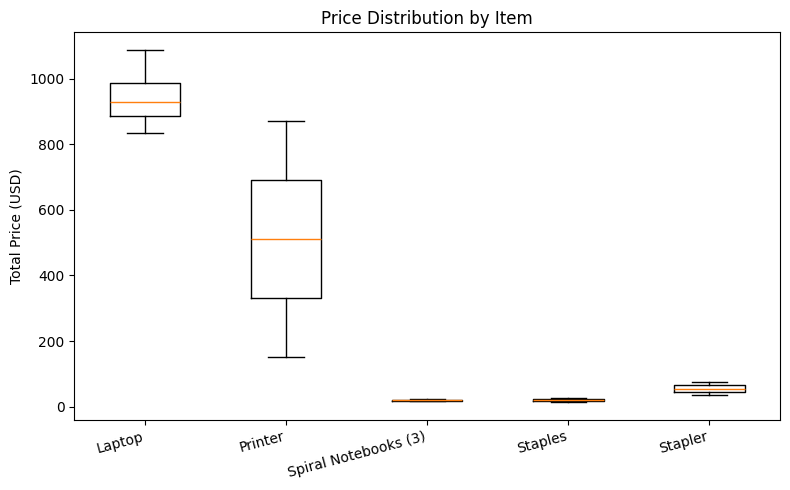

In [26]:
# Box plot to show spread across retailers for each item
plt.figure(figsize=(8,5))
items = valid["Item"].unique()
data = [valid.loc[valid["Item"]==it, "Total_Final"].values for it in items]
plt.boxplot(data, labels=items, vert=True, showfliers=True)
plt.title("Price Distribution by Item")
plt.ylabel("Total Price (USD)")
plt.xticks(rotation=15, ha="right")
plt.tight_layout()
plt.savefig("price_distribution_by_item.png", dpi=200)
plt.show()

In [27]:
display_cols = ["Item","Retailer","Total_Final","Product_URL","Quotes_Count","Average_Total"]
tbl = summary[display_cols].copy()
tbl = tbl.sort_values("Item").reset_index(drop=True)
tbl

,Item,Retailer,Total_Final,Product_URL,Quotes_Count,Average_Total
0,Laptop,NFM,834.75,https://www.nfm.com/acer-14-swift-go-14--intel...,4,945.1625
1,Printer,Amazon,149.99,https://www.amazon.com/Brother-Monochrome-Mult...,2,510.0100
2,Spiral Notebooks (3),Staples,16.74,https://www.staples.com/staples-1-subject-note...,2,19.6350
3,Stapler,Staples,34.94,https://www.staples.com/swingline-747-business...,2,54.9750
4,Staples,Bostitch,12.98,https://bostitchoffice.com/premium-standard-st...,2,19.1300


In [28]:
from docx import Document
from docx.shared import Inches

doc = Document()
doc.add_heading("Price Research Summary", level=1)

doc.add_paragraph("This report summarizes current prices collected from reputable U.S. retailers. "
                  "Totals include item price + shipping + (price × tax rate) when provided. "
                  "Only in-stock quotes were considered for ‘lowest’ and ‘average’ calculations.")

# Insert figures you saved
for fig in ["lowest_price_by_item.png", "average_price_by_item.png", "lowest_price_with_retailer.png", "price_distribution_by_item.png"]:
    doc.add_picture(fig, width=Inches(6))
    doc.add_paragraph("")  # spacing

# Add key table
doc.add_heading("Lowest & Average Prices", level=2)
# Quick text table (simple). For a prettier table you can render separately and paste.
for _, row in tbl.iterrows():
    doc.add_paragraph(f"- {row['Item']}: Lowest ${row['Total_Final']} at {row['Retailer']} | "
                      f"Avg ${row['Average_Total']:.2f} | {row['Quotes_Count']} quotes")

out_path = "Price_Research_Summary.docx"
doc.save(out_path)
out_path

'Price_Research_Summary.docx'